In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def confusion_matrix(y_true, y_pred, labels):
  cm = np.zeros((len(labels),len(labels)))
  for predicted_label in labels:
    for true_label in labels:
      cm[predicted_label, true_label] = np.logical_and(
          (y_true == true_label), (y_pred == predicted_label)
      ).sum()
  return cm

def plot_confusion_matrix(y_true, y_hat, labels, label_names = None):
  """
  Plots the confusion matrix.
  """
  cm = confusion_matrix(y_true = y_true, y_pred = y_hat, labels = labels)
  fig, ax = plt.subplots(figsize=(16, 12))
  im = ax.imshow(cm)
  # We want to show all ticks...
  ax.set_xticks(np.arange(len(labels)))
  ax.set_yticks(np.arange(len(labels)))

  # ... and label them with the respective list entries
  if label_names is not None:
    ax.set_xticklabels(label_names)
    ax.set_yticklabels(label_names)
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")
    

  # Loop over data dimensions and create text annotations.
  for i in range(len(labels)):
      for j in range(len(labels)):
          text = ax.text(j, i, f"{cm[i, j]:.0f}",
                        ha="center", va="center", color="w")
  fig.colorbar(im)
  plt.show()

# MNIST

## Dataset tasks

### Obtaining the dataset

First of all, we will download the dataset using scikit-learn.

In [27]:
from sklearn import datasets

digits = datasets.load_digits()

# -- Create a DataFrame with it.
df_digits = pd.DataFrame(digits['data'])
df_digits['label'] = digits['target']

target_names = digits.target_names
labels = list(range(len(target_names)))

### Dataset distribution

As we can see on the following code, the dataset is very well balanced.

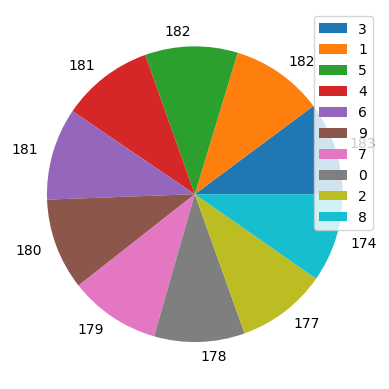

In [28]:
distribution_count = df_digits.label.value_counts()
plt.pie(distribution_count.values, labels=distribution_count.values)
plt.legend(distribution_count.keys())
plt.show()

### Dataset normalization

There's no need to normalize the dataset since all values are set between 0 and 16.

### Dataset splitting

First of all, we will shuffle the dataset to avoid any bias.

In [29]:
df_digits_shuffle = df_digits.sample(frac=1.0, random_state = 0).reset_index(drop = True)

Then, we will split the dataset into a training set and a testing set. Then, we will split the training set into a training set and a validation set.

In [30]:
def df_split(
    df: pd.DataFrame, 
    frac: float = 0.15
  ):
  n_total = len(df)
  n_split_2 = int(n_total * frac)
  n_split_1 = n_total - n_split_2
  
  assert n_split_1 > 0 and n_split_2 > 0, "Splits must not be empty."

  df_split_1 = df.iloc[:n_split_1].reset_index(drop = True)
  df_split_2 = df.iloc[n_split_1 : n_split_1 + n_split_2].reset_index(drop = True)
  return df_split_1, df_split_2

df_train_complete, df_test = df_split(df_digits_shuffle, 0.3)
df_train, df_val = df_split(df_train_complete, 0.3)

print(f"Training has {len(df_train)}, validation has {len(df_val)} and test has {len(df_test)} samples.")

x_train_complete = df_train_complete.iloc[:,:64].to_numpy()
y_train_complete = df_train_complete.iloc[:,64].to_numpy()
x_train = df_train.iloc[:,:64].to_numpy()
y_train = df_train.iloc[:,64].to_numpy()
x_val = df_val.iloc[:,:64].to_numpy()
y_val = df_val.iloc[:,64].to_numpy()
x_test = df_test.iloc[:,:64].to_numpy()
y_test = df_test.iloc[:,64].to_numpy()

Training has 881, validation has 377 and test has 539 samples.


## Training a model

Due to the high dimensionality of the dataset, we will first apply PCA to reduce the number of features.

### Logistic regression

First of all, we will train a logistic regression model.

The accuracy of the model is 0.961038961038961


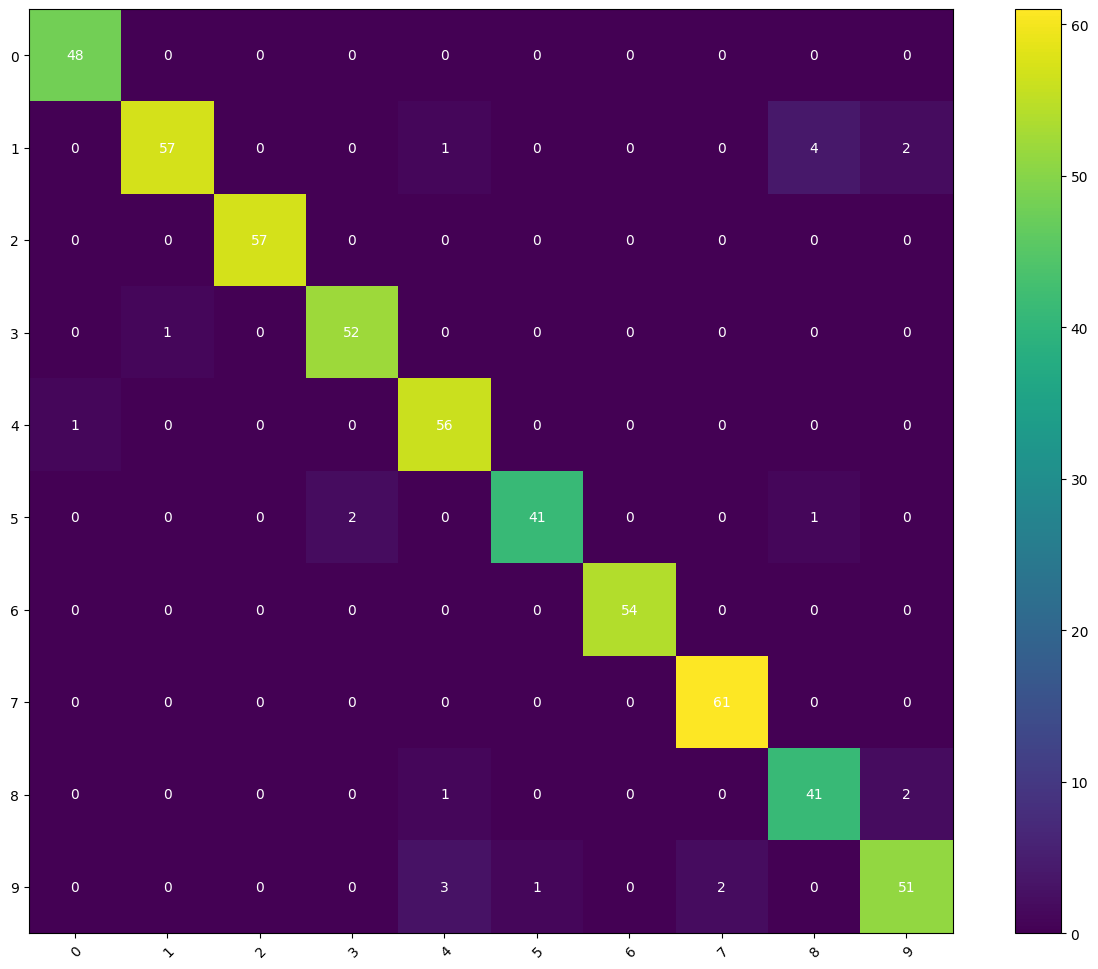

In [31]:
from sklearn.linear_model import LogisticRegression

# make instance of the model
logisticRegr = LogisticRegression(max_iter=10000)
# fit the model (training)
logisticRegr.fit(x_train, y_train)
# test the model (prediction)
y_test_hat = logisticRegr.predict(x_test)
# evaluate the model (accuracy)
score = logisticRegr.score(x_test, y_test)
print(f"The accuracy of the model is {score}")
plot_confusion_matrix(y_test, y_test_hat, labels, target_names)

Number of misclassified samples: 21


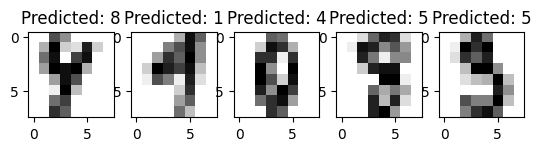

In [32]:
# show some of the misclassified images
misclassified = np.where(y_test != y_test_hat)[0]
n_misclassified = len(misclassified)
print(f"Number of misclassified samples: {n_misclassified}")
n_show = 5
for i in range(n_show):
  plt.subplot(1, n_show, i + 1)
  plt.imshow(x_test[misclassified[i]].reshape(8,8), cmap=plt.cm.gray_r)
  plt.title(f"Predicted: {y_test_hat[misclassified[i]]}")
plt.show()

### SVM

Now we will train a SVM model.

The accuracy of the model is 0.9907235621521335


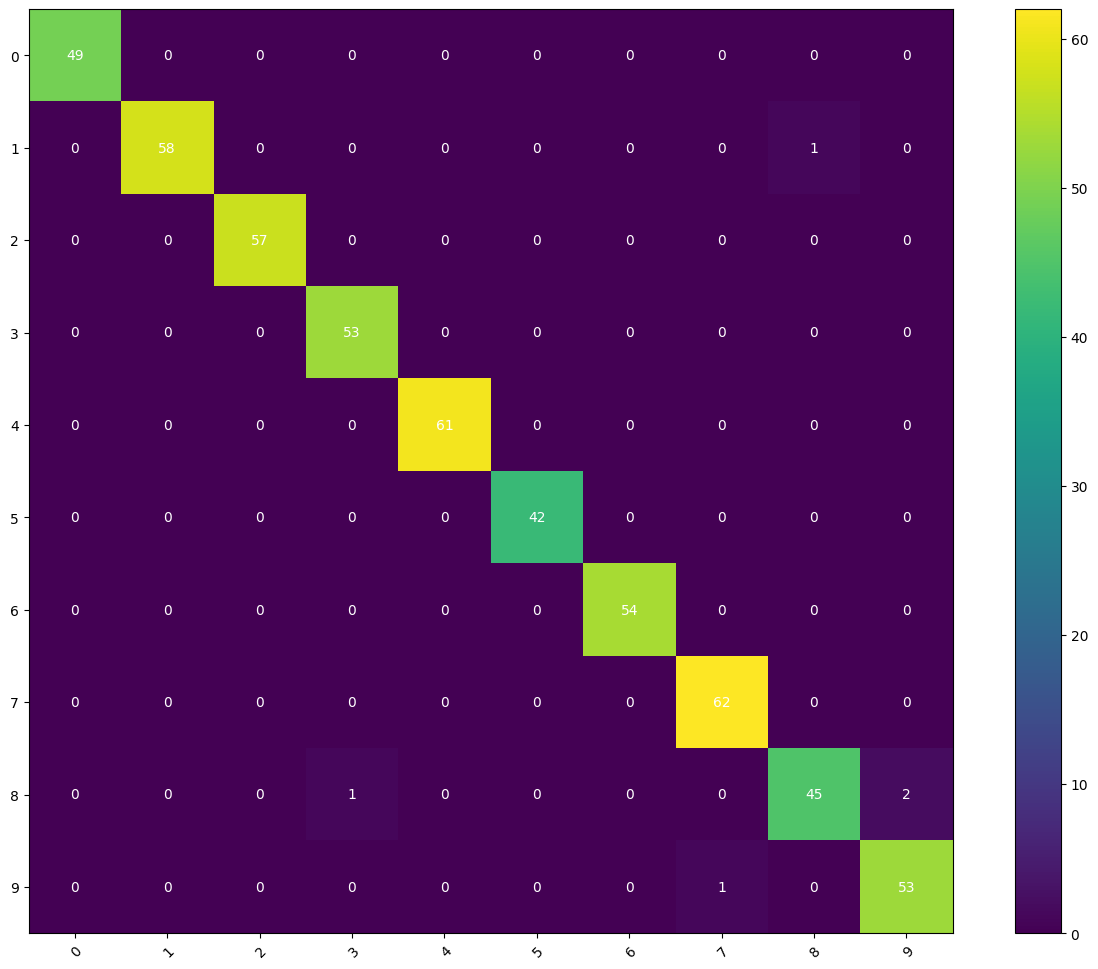

In [33]:
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100)
svc.fit(x_train, y_train)
y_test_hat = svc.predict(x_test)
score = svc.score(x_test, y_test)
print(f"The accuracy of the model is {score}")
plot_confusion_matrix(y_test, y_test_hat, labels, target_names)

Number of misclassified samples: 5


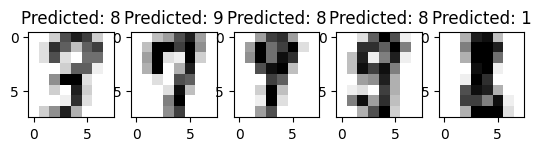

In [34]:
# show some of the misclassified images
misclassified = np.where(y_test != y_test_hat)[0]
n_misclassified = len(misclassified)
print(f"Number of misclassified samples: {n_misclassified}")
n_show = 5
for i in range(n_show):
  plt.subplot(1, n_show, i + 1)
  plt.imshow(x_test[misclassified[i]].reshape(8,8), cmap=plt.cm.gray_r)
  plt.title(f"Predicted: {y_test_hat[misclassified[i]]}")
plt.show()